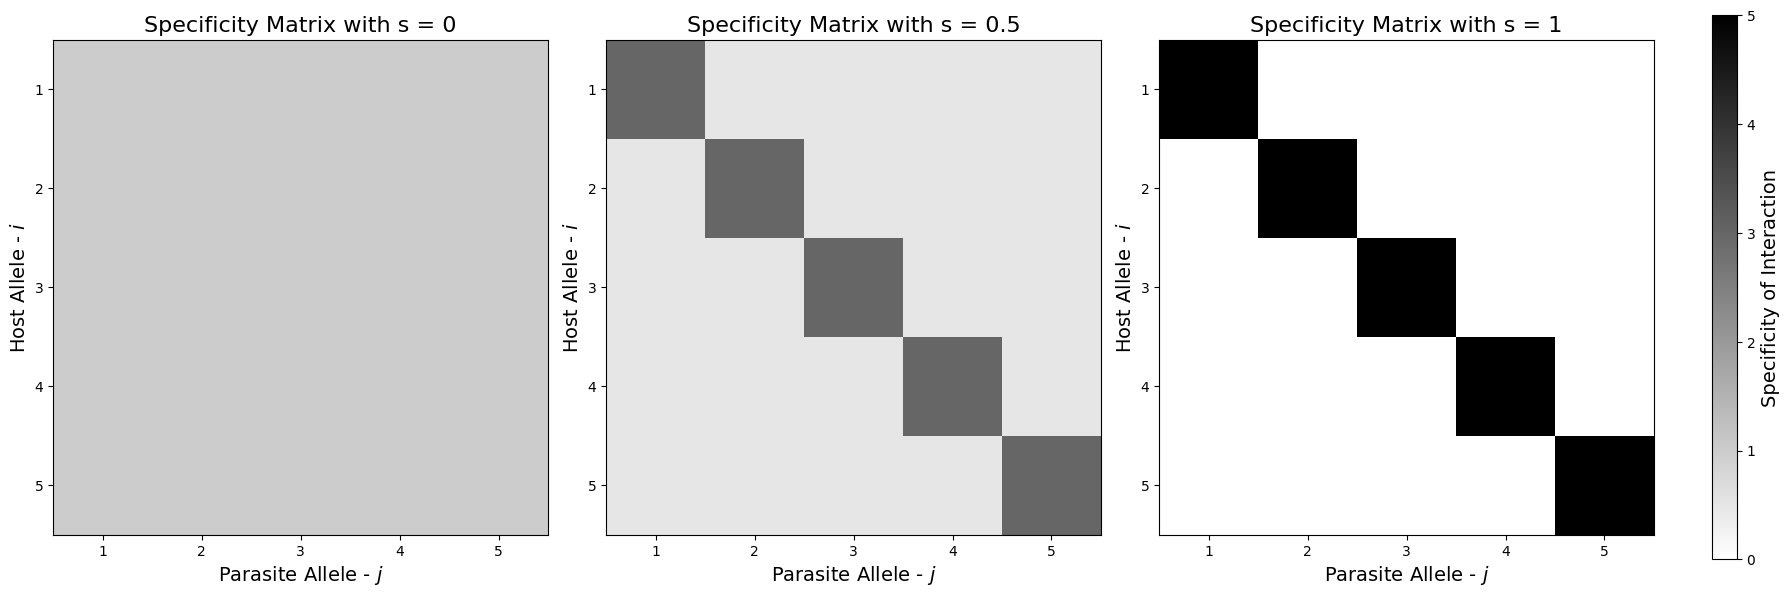

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import Normalize

# Function to create the infection matrix Q
def create_infection_matrix(s, N):
    Q = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i == j:
                Q[i, j] = 1 + (N-1)*s
            else:
                Q[i, j] = 1 - s
    return Q

# Values of s to simulate
s_values = [0, 0.5, 1]
N = 5  # Size of the Q matrix

# Set up the figure and axes using GridSpec
fig = plt.figure(figsize=(18, 6))
gs = gridspec.GridSpec(1, len(s_values) + 1, width_ratios=[1] * len(s_values) + [0.05])

axs = [fig.add_subplot(gs[i]) for i in range(len(s_values))]

# Determine the global min and max values across all Q matrices
global_min = float('inf')
global_max = float('-inf')

# Compute the min and max values for normalization
for s in s_values:
    Q = create_infection_matrix(s, N)
    global_min = min(global_min, Q.min())
    global_max = max(global_max, Q.max())

# Plot each Q matrix
for idx, s in enumerate(s_values):
    # Create the Q matrix for the current s
    Q = create_infection_matrix(s, N)

    # Plot the heatmap with flipped y-axis
    ax = axs[idx]
    im = ax.imshow(Q, cmap='gray_r', vmin=global_min, vmax=global_max)  
    
    # Set title and labels
    ax.set_title(f'Specificity Matrix with s = {s}', fontsize=16)
    ax.set_xlabel('Parasite Allele - $j$', fontsize=14)
    ax.set_ylabel('Host Allele - $i$', fontsize=14)

    # Set ticks
    ax.set_xticks(range(N))
    ax.set_yticks(range(N))
    ax.set_xticklabels(range(1, N+1))
    ax.set_yticklabels(range(1, N+1))

# Add a single colorbar on the right side
cbar_ax = fig.add_subplot(gs[-1])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.set_label('Specificity of Interaction', fontsize=14)

# Adjust layout and save the figure
plt.tight_layout()
plt.savefig('Q_matrix_heatmap.png', dpi=300)
plt.show()
